# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [9]:
#Visualización
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
import pandas as pd
data = pd.DataFrame({'Age' : [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

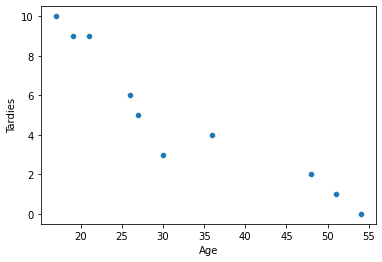

In [4]:
# Your code here.
import seaborn as sns
sns.scatterplot(x = 'Age', y = 'Tardies', data =data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

### Yes, there is a negative correlation between Age and Tardies, meaning the older you are the less likely you are to be late 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
data.corr()
#Corellation includes both the direction and magnitude of the effect the variables have on each other

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [8]:
data.cov()
#covariance indicates the direction of the linear relationship between the two variables.

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your response here.
lr = LinearRegression()

In [15]:
#we fit the model with a dependent variable (tardies) and independent variable (age)
lr.fit(X = data[['Age']],
      y = data.Tardies)
print(lr.coef_)
print(lr.intercept_)

[-0.24282077]
12.888803363135768


In [16]:
#Create a new column with predicted values for the Age column using our model.
data['predict_tardies'] = lr.predict(np.array(data[['Age']]))

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='predict_tardies'>

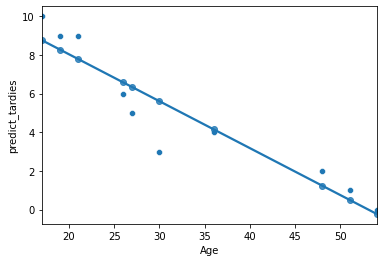

In [17]:
# Your code here.
sns.scatterplot(x = data['Age'], y = data['Tardies'])
sns.regplot(x = data['Age'], y = data['predict_tardies'])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
results = smf.ols("Tardies ~ Age", data=data).fit()
results.summary()

/Users/javiercabrera/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        15:44:22   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This model is pretty trustworthy, it has an R2 of .882 indicating a good fit, and both p-values reject the null hypothesis, meaning they are significative predictors

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [20]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
# we create a dataframe with the independent and dependent variables we are interested in analyzing.
vehicles_important = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
#We create a coorelation matrix of the variables to each other.
vehicles_important.corr()

#From the following correlation matrix, we can see that the variable that correlates to our target variable 
#with the highest magnitude is Fuel Barrels/Year with positive correlation, followed by Fuel Cost/Year (positive) 
#and Comined MPG(negative) 

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [32]:
vehicles_important.rename(columns = {'CO2 Emission Grams/Mile': 'CO2_Emissions', 'Fuel Barrels/Year':'Fuel_Barrels', 'Combined MPG':'Combined_MPG', 'Fuel Cost/Year': 'Fuel_Cost'}, inplace = True)


In [30]:
vehicles_important

,Year,Cylinders,Fuel_Barrels,Combined_MPG,Fuel_Cost,CO2_Emissions
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [37]:
# We are using a multivariative linear regression.
results_vehicles = smf.ols("CO2_Emissions ~ Year + Cylinders + Fuel_Barrels + Combined_MPG + Fuel_Cost", data= vehicles_important).fit()
results_vehicles.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:13:17   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      769.8883     19.392     39.702      0.000     731.880     807.897
Year            -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders        1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG    -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

### Answer
The model is very good at predicting our target value with an R2 of .981, almost perfect predictor. As we can see the most influential variable is Fuel_Barrels with the highest coefficient and T-values (meaning highest degree of precision and highest order magnitude). Because all the variables have a p value of 0 they are all significant to forming our predictive model. Our models R2 equals .981, meaning that it explains the variability of the CO2 emissions with a 98.1 % degree of confidence.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [39]:
# Your code here. 
party = pd.DataFrame({'invited': [1, 3, 4, 6, 8, 9, 11, 14], 'attended': [1, 2, 4, 4, 5, 7, 8, 13]})
party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='invited', ylabel='prediction'>

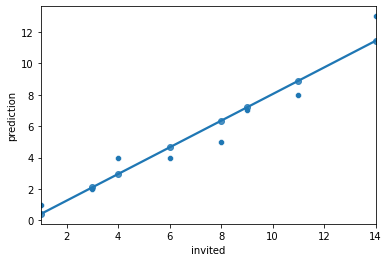

In [46]:
# Your code here.
sns.scatterplot(x = party.invited, y = party.attended)
ln = LinearRegression()
ln.fit(X = party[['invited']], y = party.attended)
party['prediction'] = ln.predict(np.array(party[['invited']]))
sns.regplot(x = party['invited'], y = party['prediction'])

In [48]:
party

,invited,attended,prediction
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

### Answer
The relationship between the variables very highly positive. This means that the more people you invite the more people attend.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [57]:
# Your response here. 
party['error^2'] = (party['attended'] - party['prediction'])**2
party.drop('error', axis = 1)
#the value with the highest error is index 7 we will drop it.
party_no_outlier = party.drop(7)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

<AxesSubplot:xlabel='invited', ylabel='prediction2'>

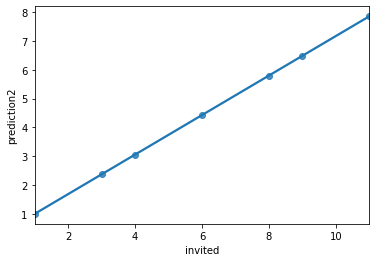

In [59]:
# Your response here. 
ln2 = LinearRegression()
ln2.fit(X = party_no_outlier[['invited']], y = party_no_outlier.attended)
party_no_outlier['prediction2'] = ln2.predict(np.array(party_no_outlier[['invited']]))
sns.regplot(x = party_no_outlier['invited'], y = party_no_outlier['prediction2'])

the model now fits perfectly for all values.